In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

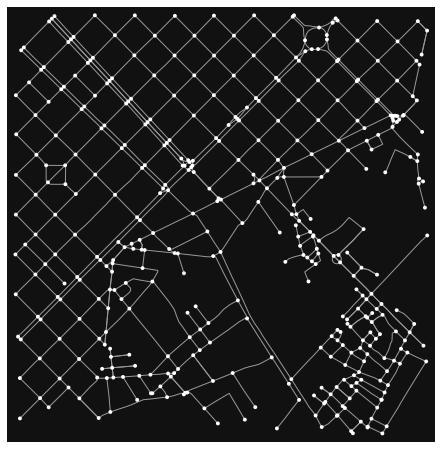

408
694


In [7]:
G_drive = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 1000, network_type = 'drive')
ox.plot_graph(G_drive)
print(len(G_drive.nodes))
print(len(G_drive.edges))

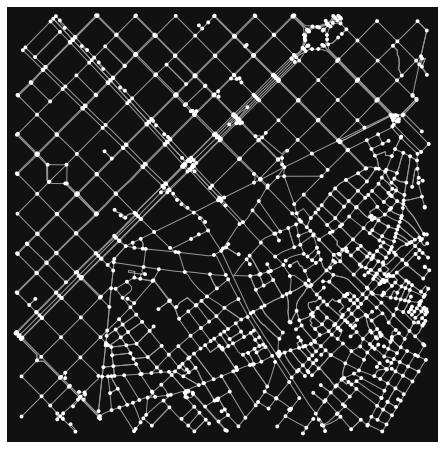

1247
2556


In [147]:
G_bike = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 1000, network_type = 'bike')
ox.plot_graph(G_bike)
print(len(G_bike.nodes))
print(len(G_bike.edges))

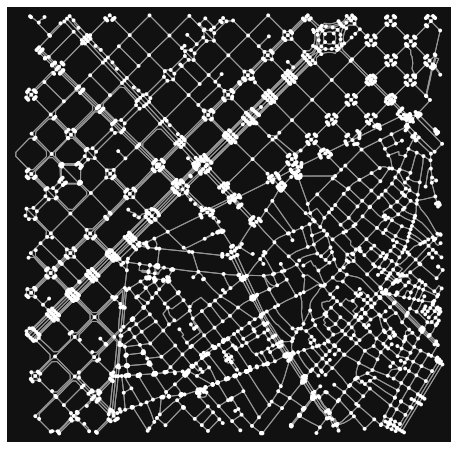

2489
7108


In [148]:
G_walk = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 1000, network_type = 'walk')
ox.plot_graph(G_walk)
print(len(G_walk.nodes))
print(len(G_walk.edges))

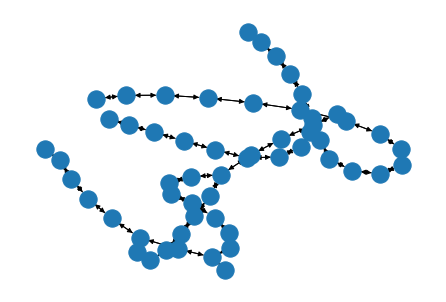

In [31]:
G_tram = nx.read_graphml("../BCNgraphs/tram.graphml")
nx.draw_spring(G_tram)

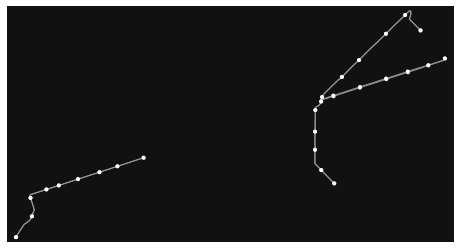

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
G_tram = ox.load_graphml("../BCNgraphs/tram.graphml")
ox.plot_graph(G_tram)

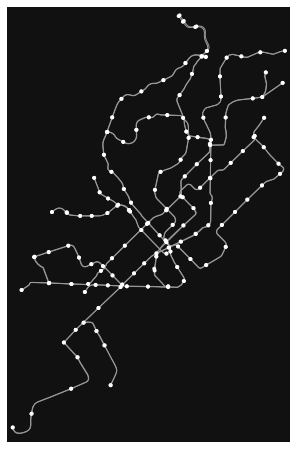

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
G_subway = ox.load_graphml("../BCNgraphs/subway.graphml")
ox.plot_graph(G_subway)

# Join the graphs

In [143]:
nx.compose_all?

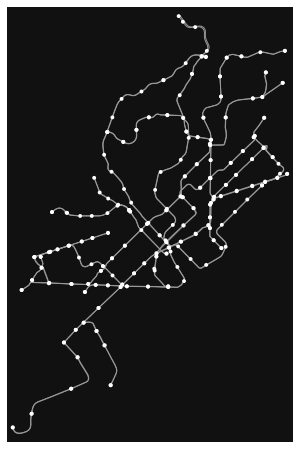

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
G_union = nx.compose_all([G_subway,G_tram])
ox.plot_graph(G_union)

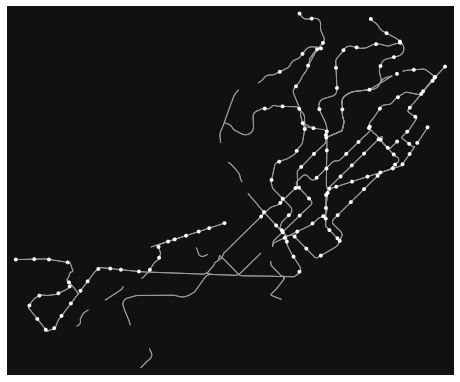

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [14]:
G_union = ox.consolidate_intersections((G_union), rebuild_graph=True, tolerance=15, dead_ends=False)
ox.plot_graph(G_union)

In [15]:
print(len(G_union.nodes))
print(len(G_union.edges))

139
404


In [155]:
union_nodes, union_edges = ox.graph_to_gdfs(G_union)
union_edges.dropna(axis=1, how='any') 
#union_edges.loc[union_edges['highway']=='living_street']

,osmid,oneway,highway,length,geometry,u_original,v_original,u,v,key
0,173769630,True,residential,109.649251,"LINESTRING (431371.542 4581068.350, 431398.827...",190993191,30252172,0,25,0
1,173769630,False,residential,67.591739,"LINESTRING (431371.542 4581068.350, 431355.986...",1845261211,30252172,0,25,1
2,246640824,False,secondary,79.473503,"LINESTRING (431371.542 4581068.350, 431398.827...",190993191,4182135650,0,29,0
3,416454322,False,pedestrian,90.688844,"LINESTRING (431371.542 4581068.350, 431355.986...",1845261211,30252189,0,33,0
4,18510288,False,secondary,201.361421,"LINESTRING (431371.542 4581068.350, 431408.393...",1401457839,1401457869,0,38-1,0
...,...,...,...,...,...,...,...,...,...,...
3155,"[305108017, 4809711]",False,"[residential, pedestrian]",118.965038,"LINESTRING (430277.038 4581226.256, 430279.497...",30884291,7042287292,71-0,92,0
3156,246638752,False,residential,65.139983,"LINESTRING (430277.038 4581226.256, 430256.035...",2560076882,3096906055,71-0,66-1,0
3157,241867923,False,pedestrian,128.129473,"LINESTRING (430277.038 4581226.256, 430256.035...",2560076882,30647873,71-0,18,0
3158,246638752,False,residential,80.240742,"LINESTRING (430277.038 4581226.256, 430293.157...",7042178682,7042178676,71-0,67,0


## Routing 

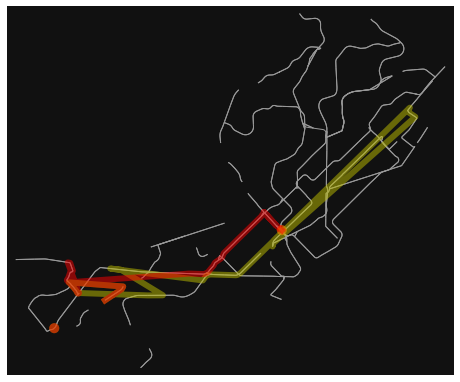

In [16]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G_union)[randint(0,len(G_union))]
dest = list(G_union)[randint(0,len(G_union))]
try:
    route1 = ox.shortest_path(G_union, orig,dest, weight='length')
    route2 = ox.shortest_path(G_union, orig,dest, weight='travel_time')
    # plot the routes
    fig, ax = ox.plot_graph_routes(G_union, routes=[route1, route2], route_colors=['y', 'r'],
                               route_linewidth=6, node_size=0)
except:
    print("no path to", dest)